In [4]:

# set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # split data
from sklearn.preprocessing import MinMaxScaler # normalization scaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  

# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# use following to allow the warning for once
# warnings.filterwarnings(action='once')

In [5]:
# read in data from csv file
por = pd.read_csv("student-alcohol-consumption/student-mat.csv")
math = pd.read_csv("student-alcohol-consumption/student-por.csv")

# Combining 2 dataframe
df = pd.concat([por,math], sort= True, ignore_index=False)

# # Rename column in nice df to print out nicely
# df_nice = df.rename({'Dalc':'Weekday Alc Consumption (1=low, 5=high)', 'Fedu':'Feather Education (0=none, 5=higher edu)', 'Fjob':'Father Job', 'G1':'Period 1 Grades (0-20 Scale)', 'G2':'Period 2 Grades (0-20 Scale)', 'G3':'Final Grade (0-20 Scale)', 'Medu':'Mother Education (0=none, 5=higher edu)', 'Mjob':'Mother Job', 'Pstatus':'Parents Living Together(T), Apart(A)','Walc':'Weekend Alc Consumption (1=low, 5=high)', 'absences':'Number of School Absences', 'activities':'Extra Curricular Activities', 'address':'Urban(U)/Rural(R) Location', 'age': 'Student Age', 'failures':'Number of Failures', 'famrel':'Family Relationship Quality (1=not good, 5=good)', 'famsize':'Family Size (LE3:<=3, GT3:>3', 'famsup':'Family Education Support', 'freetime':'Free Time (1=low, 5=high)','goout':'Go Out w/ Friends (1=low, 5=high)', 'guardian':'Guardian', 'health':'Current Health Status (1=bad, 5=good)', 'higher':'Wants to take Higher Education', 'internet':'Internet', 'nursery':'Attended Nursery School', 'paid':'Paid for Extra Classes', 'reason':'Reason to Choose this School', 'romantic':'In a Romantic Relationship', 'school':'Student School (GP=Gabriel Pereira, MS=Mousinho da Silveira)', 'schoolsup':'Extra Educational Support', 'sex':'Student Sex', 'studytime':'Weekly Studytime', 'traveltime':'Travel Time to School (1=<15 min, 2=15-30 min, 3=30 min-1 hour, 4=>1 hour)'}, axis='columns')

# ## Changing numeric variables to categorical variables
# df_stats['internet'] = df_stats.internet.factorize( ['yes', 'no'] )[0]
# df_stats['activities'] = df_stats.activities.factorize( ['yes', 'no'] )[0]
# df_stats['romantic'] = df_stats.romantic.factorize( ['yes', 'no'] )[0]
# df_stats["Dalc"] = df_stats["Dalc"].values
# df_stats["goout"] = df_stats["goout"].values.astype(str).astype(int)

df.columns

Index(['Course', 'Dalc', 'Fedu', 'Fjob', 'G1', 'G2', 'G3', 'Medu', 'Mjob',
       'Pstatus', 'Walc', 'absences', 'activities', 'address', 'age',
       'failures', 'famrel', 'famsize', 'famsup', 'freetime', 'goout',
       'guardian', 'health', 'higher', 'internet', 'nursery', 'paid', 'reason',
       'romantic', 'school', 'schoolsup', 'sex', 'studytime', 'traveltime'],
      dtype='object')

In [6]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Create social index
temp = df.copy()
temp['internet'] = temp.internet.factorize( ['yes', 'no'] )[0]
temp['activities'] = temp.activities.factorize( ['yes', 'no'] )[0]
temp['romantic'] = temp.romantic.factorize( ['yes', 'no'] )[0]
temp["goout"] = temp["goout"].values.astype(str).astype(int)

temp['social_index'] = temp['goout'] * 0.25 + temp['internet'] * 0.02 + temp['romantic'] * 0.03 + temp['activities'] * -0.01
df['social_index'] = temp['social_index']


df.head()

,Course,Dalc,Fedu,Fjob,G1,G2,G3,Medu,Mjob,Pstatus,Walc,absences,activities,address,age,failures,famrel,famsize,famsup,freetime,goout,guardian,health,higher,internet,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,traveltime,social_index
0,Math,1,4,teacher,5,6,6,4,at_home,A,1,6,no,U,18,0,4,GT3,no,3,4,mother,3,yes,no,yes,no,course,no,GP,yes,F,2,2,1.00
1,Math,1,1,other,5,5,6,1,at_home,T,1,4,no,U,17,0,5,GT3,yes,3,3,father,3,yes,yes,no,no,course,no,GP,no,F,2,1,0.77
2,Math,2,1,other,7,8,10,1,at_home,T,3,10,no,U,15,3,4,LE3,no,3,2,mother,3,yes,yes,yes,yes,other,no,GP,yes,F,2,1,0.52
3,Math,1,2,services,15,14,15,4,health,T,1,2,yes,U,15,0,3,GT3,yes,2,2,mother,5,yes,yes,yes,yes,home,yes,GP,no,F,3,1,0.54
4,Math,1,3,other,6,10,10,3,other,T,2,4,no,U,16,0,4,GT3,yes,3,2,father,5,yes,no,yes,yes,home,no,GP,no,F,2,1,0.50


In [7]:

df.isnull().sum()


Course          0
Dalc            0
Fedu            0
Fjob            0
G1              0
G2              0
G3              0
Medu            0
Mjob            0
Pstatus         0
Walc            0
absences        0
activities      0
address         0
age             0
failures        0
famrel          0
famsize         0
famsup          0
freetime        0
goout           0
guardian        0
health          0
higher          0
internet        0
nursery         0
paid            0
reason          0
romantic        0
school          0
schoolsup       0
sex             0
studytime       0
traveltime      0
social_index    0
dtype: int64

In [9]:
# Get Dummie Variable

df = pd.get_dummies(df)

In [6]:
df.head()

,Dalc,Fedu,G1,G2,G3,Medu,Walc,absences,age,failures,famrel,freetime,goout,health,studytime,traveltime,social_index,Course_Math,Course_Por,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Pstatus_A,Pstatus_T,activities_no,activities_yes,address_R,address_U,famsize_GT3,famsize_LE3,famsup_no,famsup_yes,guardian_father,guardian_mother,guardian_other,higher_no,higher_yes,internet_no,internet_yes,nursery_no,nursery_yes,paid_no,paid_yes,reason_course,reason_home,reason_other,reason_reputation,romantic_no,romantic_yes,school_GP,school_MS,schoolsup_no,schoolsup_yes,sex_F,sex_M
0,1,4,5,6,6,4,1,6,18,0,4,3,4,3,2,2,1.00,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,1,0
1,1,1,5,5,6,1,1,4,17,0,5,3,3,3,2,1,0.77,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
2,2,1,7,8,10,1,3,10,15,3,4,3,2,3,2,1,0.52,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0
3,1,2,15,14,15,4,1,2,15,0,3,2,2,5,3,1,0.54,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0
4,1,3,6,10,10,3,2,4,16,0,4,3,2,5,2,1,0.50,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0


In [11]:
outcome_dalc = df.Dalc
outcome_walc = df.Walc

df = df.drop(['Dalc', 'Walc'], axis=1)


In [8]:
# train_feature, test_feature, train_outcome, test_outcome = train_test_split(
#    df,      # features
#    outcome_dalc,    # outcome walc, dalc
#    test_size=0.10, # percentage of data to use as the test set
# )

In [9]:
# train_small_feature, validation_small_feature, train_small_outcome, validation_small_outcome = train_test_split(
#    train_feature,      # features
#    train_outcome,    # outcome
#    test_size=0.10, # percentage of data to use as the test set
# )


In [12]:
train_small_feature, validation_small_feature, train_small_outcome, validation_small_outcome = train_test_split(
   df,      # features
   outcome_dalc,    # outcome walc, dalc
   test_size=0.10, # percentage of data to use as the test set
)

In [13]:
train_small_feature.shape

(939, 32)

In [12]:

# Create the pipeline

scaler = MinMaxScaler()

dt_clf = DecisionTreeClassifier()

dt_pipeline = make_pipeline(scaler, dt_clf)

dt_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
           'decisiontreeclassifier__splitter': ['best', 'random'],
           'decisiontreeclassifier__max_depth': range(1,20,2),
           'decisiontreeclassifier__min_samples_split': range(10,500,20)}

In [8]:
dt_grid_search = GridSearchCV(dt_pipeline, dt_grid, cv = 10)

dt_grid_search.fit(train_small_feature, train_small_outcome)

NameError: name 'dt_pipeline' is not defined

In [14]:
dt_grid_search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__min_samples_split': 70,
 'decisiontreeclassifier__splitter': 'random'}

In [15]:
dt_grid_search.score(validation_small_feature, validation_small_outcome)

0.6666666666666666

In [16]:
accuracy_score(dt_grid_search.predict(validation_small_feature), validation_small_outcome)

0.6666666666666666

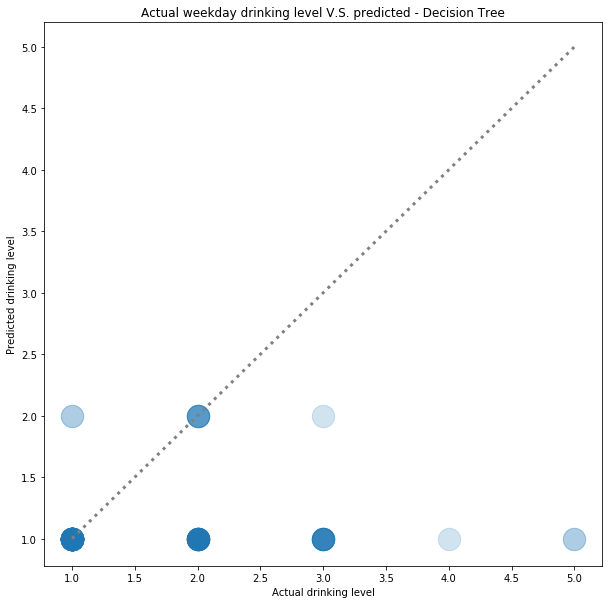

In [76]:
plt.figure(figsize=(10, 10))
plt.scatter(validation_small_outcome, dt_grid_search.predict(validation_small_feature), alpha = 0.2, s=500)
plt.plot([1, 5], [1, 5], linestyle = ':', color = 'grey', linewidth = 3)
plt.title('Actual weekday drinking level V.S. predicted - Decision Tree')
plt.xlabel('Actual drinking level')
plt.ylabel('Predicted drinking level')
plt.savefig('img/decision_tree_weekday.png')

In [18]:
# Random Forest Classifier

In [19]:

# Create the pipeline


rf_clf = RandomForestClassifier()

rf_pipeline = make_pipeline(scaler, rf_clf)


n_estimators = range(1, 1000, 10)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rf_grid = {'randomforestclassifier__n_estimators': n_estimators,
           'randomforestclassifier__criterion': criterion,
           'randomforestclassifier__max_features': max_features,
           'randomforestclassifier__max_depth': max_depth,
           'randomforestclassifier__bootstrap': bootstrap}

In [20]:
rf_grid_search = RandomizedSearchCV(rf_pipeline, rf_grid, cv = 10)

rf_grid_search.fit(train_small_feature, train_small_outcome)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_spl...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'randomforestclassifier__n_estimators': range(1, 1000, 10), 'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__max_features': ['auto', 'sqrt'], 'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestclassifier__bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

In [21]:
rf_grid_search.best_params_


{'randomforestclassifier__n_estimators': 361,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__bootstrap': False}

In [22]:
rf_grid_search.score(validation_small_feature, validation_small_outcome)

0.8

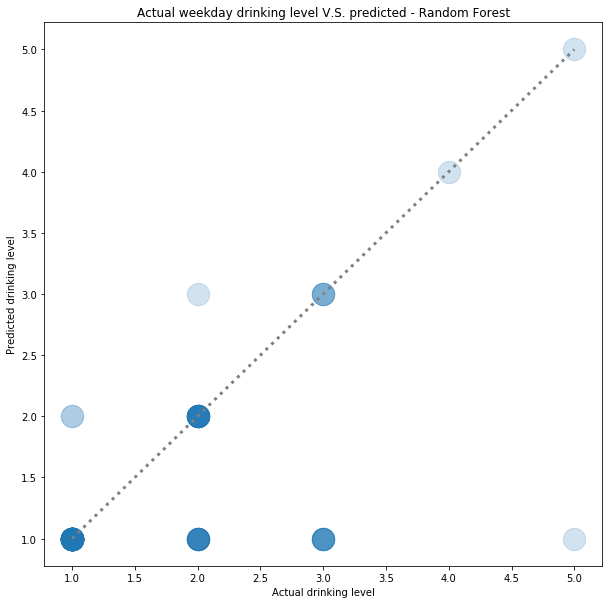

In [75]:
plt.figure(figsize=(10, 10))
plt.scatter(validation_small_outcome, rf_grid_search.predict(validation_small_feature), alpha = 0.2, s=500)
plt.plot([1, 5], [1, 5], linestyle = ':', color = 'grey', linewidth = 3)
plt.title('Actual weekday drinking level V.S. predicted - Random Forest')
plt.xlabel('Actual drinking level')
plt.ylabel('Predicted drinking level')
plt.savefig('img/random_forest_weekday.png')

In [27]:
# Support Vector Machine (SVM)

In [28]:

svc_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}



svc_grid_search = GridSearchCV(SVC(), svc_grid, cv = 10)

svc_grid_search.fit(train_small_feature, train_small_outcome)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
svc_grid_search.best_params_

{'C': 0.01, 'kernel': 'poly'}

In [30]:
svc_grid_search.score(validation_small_feature, validation_small_outcome)

0.6285714285714286

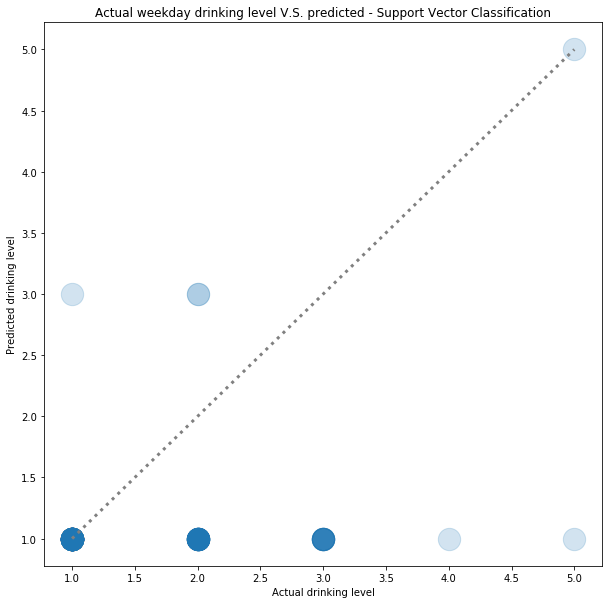

In [74]:
plt.figure(figsize=(10, 10))
plt.scatter(validation_small_outcome, svc_grid_search.predict(validation_small_feature), alpha = 0.2, s=500)
plt.plot([1, 5], [1, 5], linestyle = ':', color = 'grey', linewidth = 3)
plt.title('Actual weekday drinking level V.S. predicted - Support Vector Classification')
plt.xlabel('Actual drinking level')
plt.ylabel('Predicted drinking level')
plt.savefig('img/svc_weekday.png')

In [34]:
# Trying to use sklearn logistic regression
from sklearn.linear_model import LogisticRegression



In [3]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_small_feature, train_small_outcome)

y_pred = model.predict(validation_small_feature)
# how did our model perform?
count_misclassified = (validation_small_outcome != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(model.predict(validation_small_feature), validation_small_outcome)
print('Accuracy: {:.2f}'.format(accuracy))


NameError: name 'LogisticRegression' is not defined

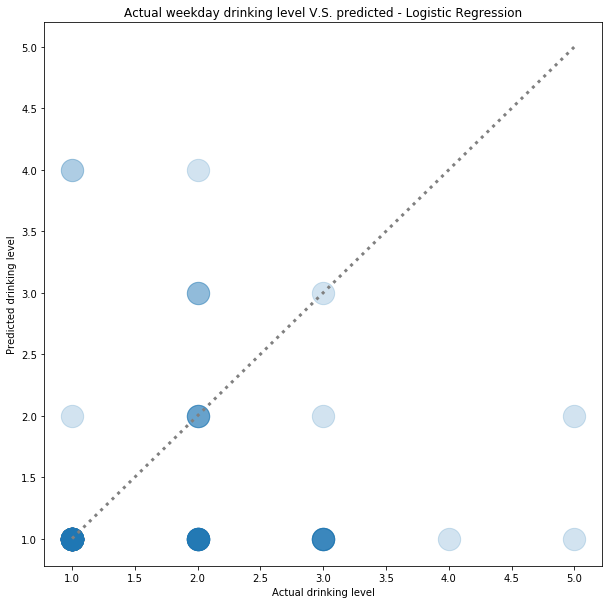

In [73]:
plt.figure(figsize=(10, 10))
plt.scatter(validation_small_outcome, model.predict(validation_small_feature), alpha = 0.2, s=500)
plt.plot([1, 5], [1, 5], linestyle = ':', color = 'grey', linewidth = 3)
plt.title('Actual weekday drinking level V.S. predicted - Logistic Regression')
plt.xlabel('Actual drinking level')
plt.ylabel('Predicted drinking level')
plt.savefig('img/logistic_regression_weekday.png')

In [18]:

algorithms = ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Reg']
weekday_drinking_accuracy = [0.6666666666666666, 0.8, 0.6285714285714286,0.66]
weekend_drinking_accuracy = [0.5428571428571428, 0.7619047619047619, 0.580952380952381, 0.47]
        
accuracy_df = pd.DataFrame({
    'algorithms': algorithms,
    'weekday_drinking_accuracy': weekday_drinking_accuracy,
    'weekend_drinking_accuracy': weekend_drinking_accuracy
})

In [19]:
accuracy_df.to_csv("accuracy_df.csv", index=False)

In [20]:
## Explore 
import plotly
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='JYCestelle', api_key='zZMBwVVRPMG0Dj5GL2Fd')

In [21]:
trace0 = go.Bar(
    x = accuracy_df['algorithms'],
    y = accuracy_df['weekday_drinking_accuracy'],
    name='weekday drinking accuracy',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x = accuracy_df['algorithms'],
    y = accuracy_df['weekend_drinking_accuracy'],
    name='weekends drinking accuracy',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',   
    title='Weekends drinking accuracy v.s. Weekday drinking accuracy',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='model_accuracy')

> After we analyzed each algorithm by drawing scatterplot, we decided to create one graph to compare the accuracy of all of algorithm in one place. We can easily tell that the prediction of random forest is the best within all of these algorithm we chose. The weekends drinking accuracy and the weekday drinking accuracy which are predicted by random forest are highest. Another fact we found out is the prediction of drinking accuracy on weekday is always better than that of drinking accuracy on weekends. The possible reasons we are thinking of are lots of people prefer to drink some during the weekends for no special reason but people who drink during the weekdays are more likely meeting some troubles in their daily life. 